# Oppgave 9 GF kapittel 2


Terrengformen i et fjellpass kan beskrives ved

$$
h(x,y) = h_0 + \frac{a}{R^2}xy
$$

hvor $h$ er høyden over et definert nullnivå og $h_0, R$ og $a$ er konstanter.

a) Tegn opp høydekonturene når $h_0=1200m$, $a=250m$ og $R=2000m$.

Bruker matplotlib og tegner konturlinjer (som her kalles høydekonturer). Tegner først et *hevet* plott av terrenget, siden dette gir det mest realistiske bildet.

<IPython.core.display.Javascript object>


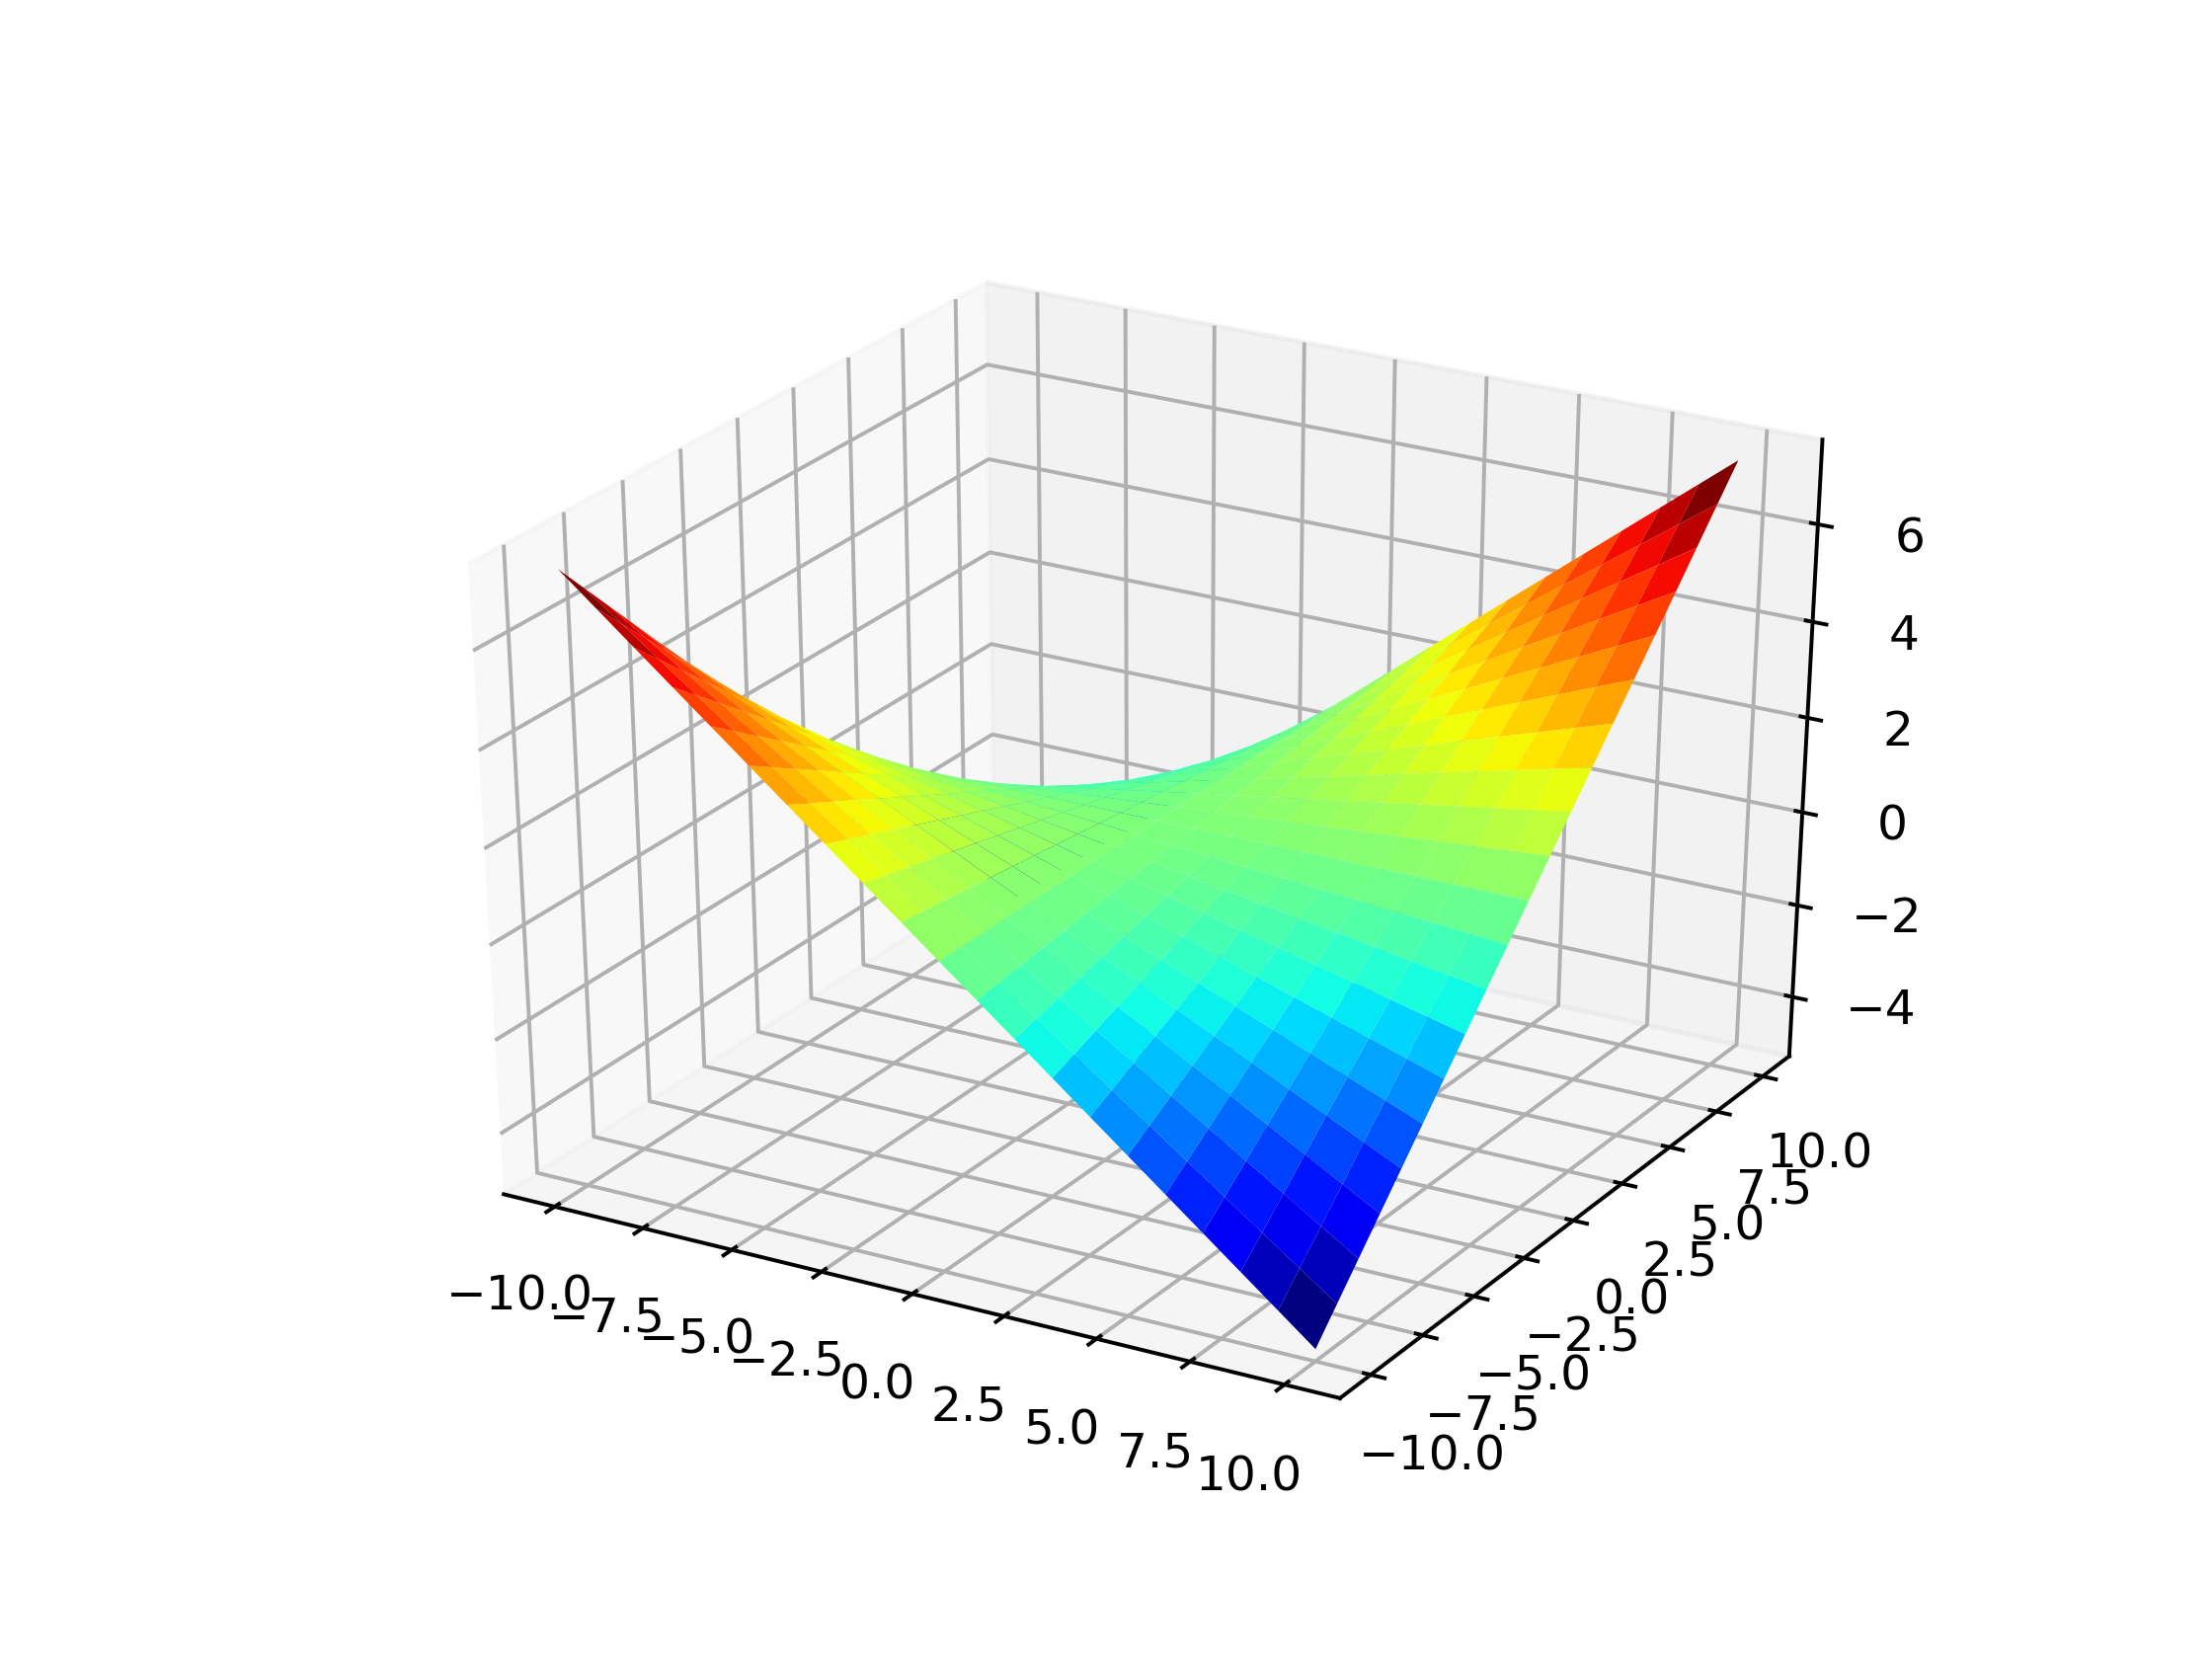

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib notebook
t = np.linspace(-10, 10, 21)
x, y = np.meshgrid(t, t, indexing="ij")
h0 = 1.2
a = 0.25
R = 2.0
h = h0 + a/R**2*x*y
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(x, y, h, cmap=plt.cm.jet)

Plotter så konturlinjer, eller høydekonturer. Her kan man eventuelt gå inn og bestemme akkurat hvilke konturer som skal tegnes, for eksempel som i fasit $[0.2, 0.95, 1.2, 1.45, 2.2]$. Ellers så kan man velge antall konturer, og så beregnes verdiene for deg av matplotlib.

<IPython.core.display.Javascript object>


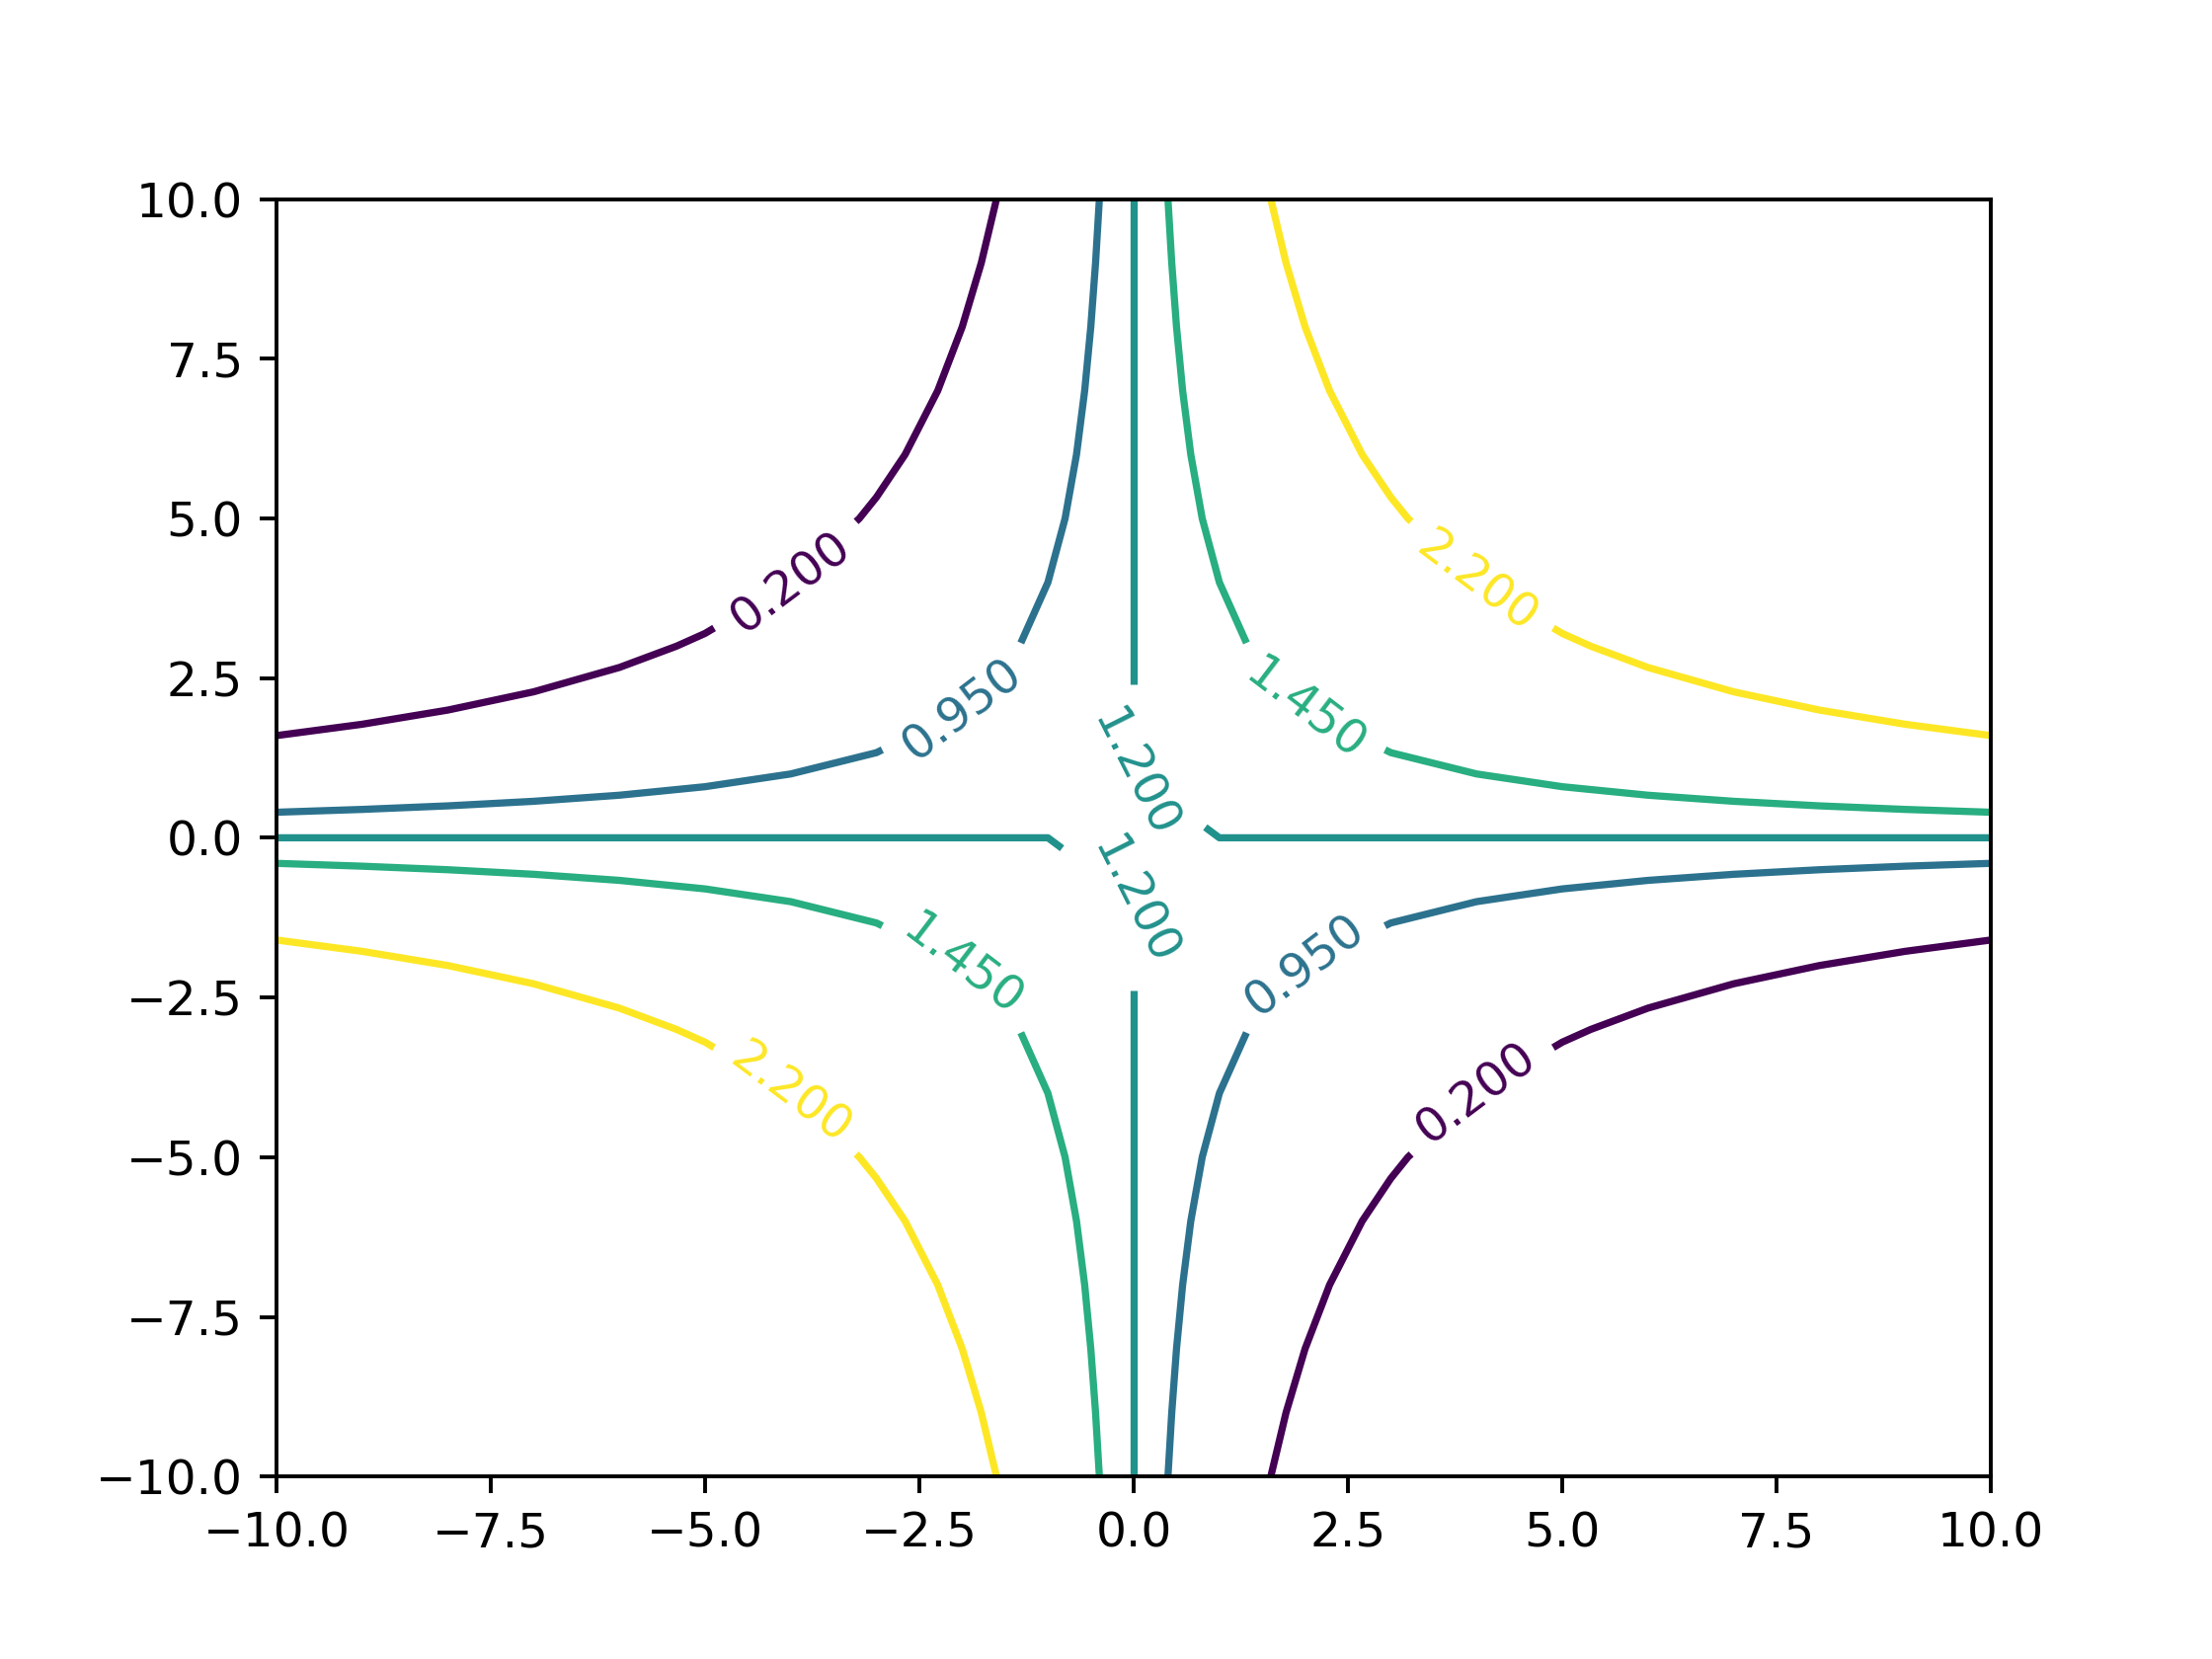

In [2]:
fig2 = plt.figure()
CS = plt.contour(x, y, h, [0.2, 0.95, 1.2, 1.45, 2.2])
plt.clabel(CS, inline=1, fontsize=10)
plt.show()

b) Hvor i terrenget er det brattest stigningstall?

Bruker sympy til å finne gradientvektoren og plotter størrelsen til vektoren. Ser at størrelsen til gradienten øker med avstand til origo, så det blir brattere og brattere når man beveger seg vekk fra origo.

<IPython.core.display.Javascript object>


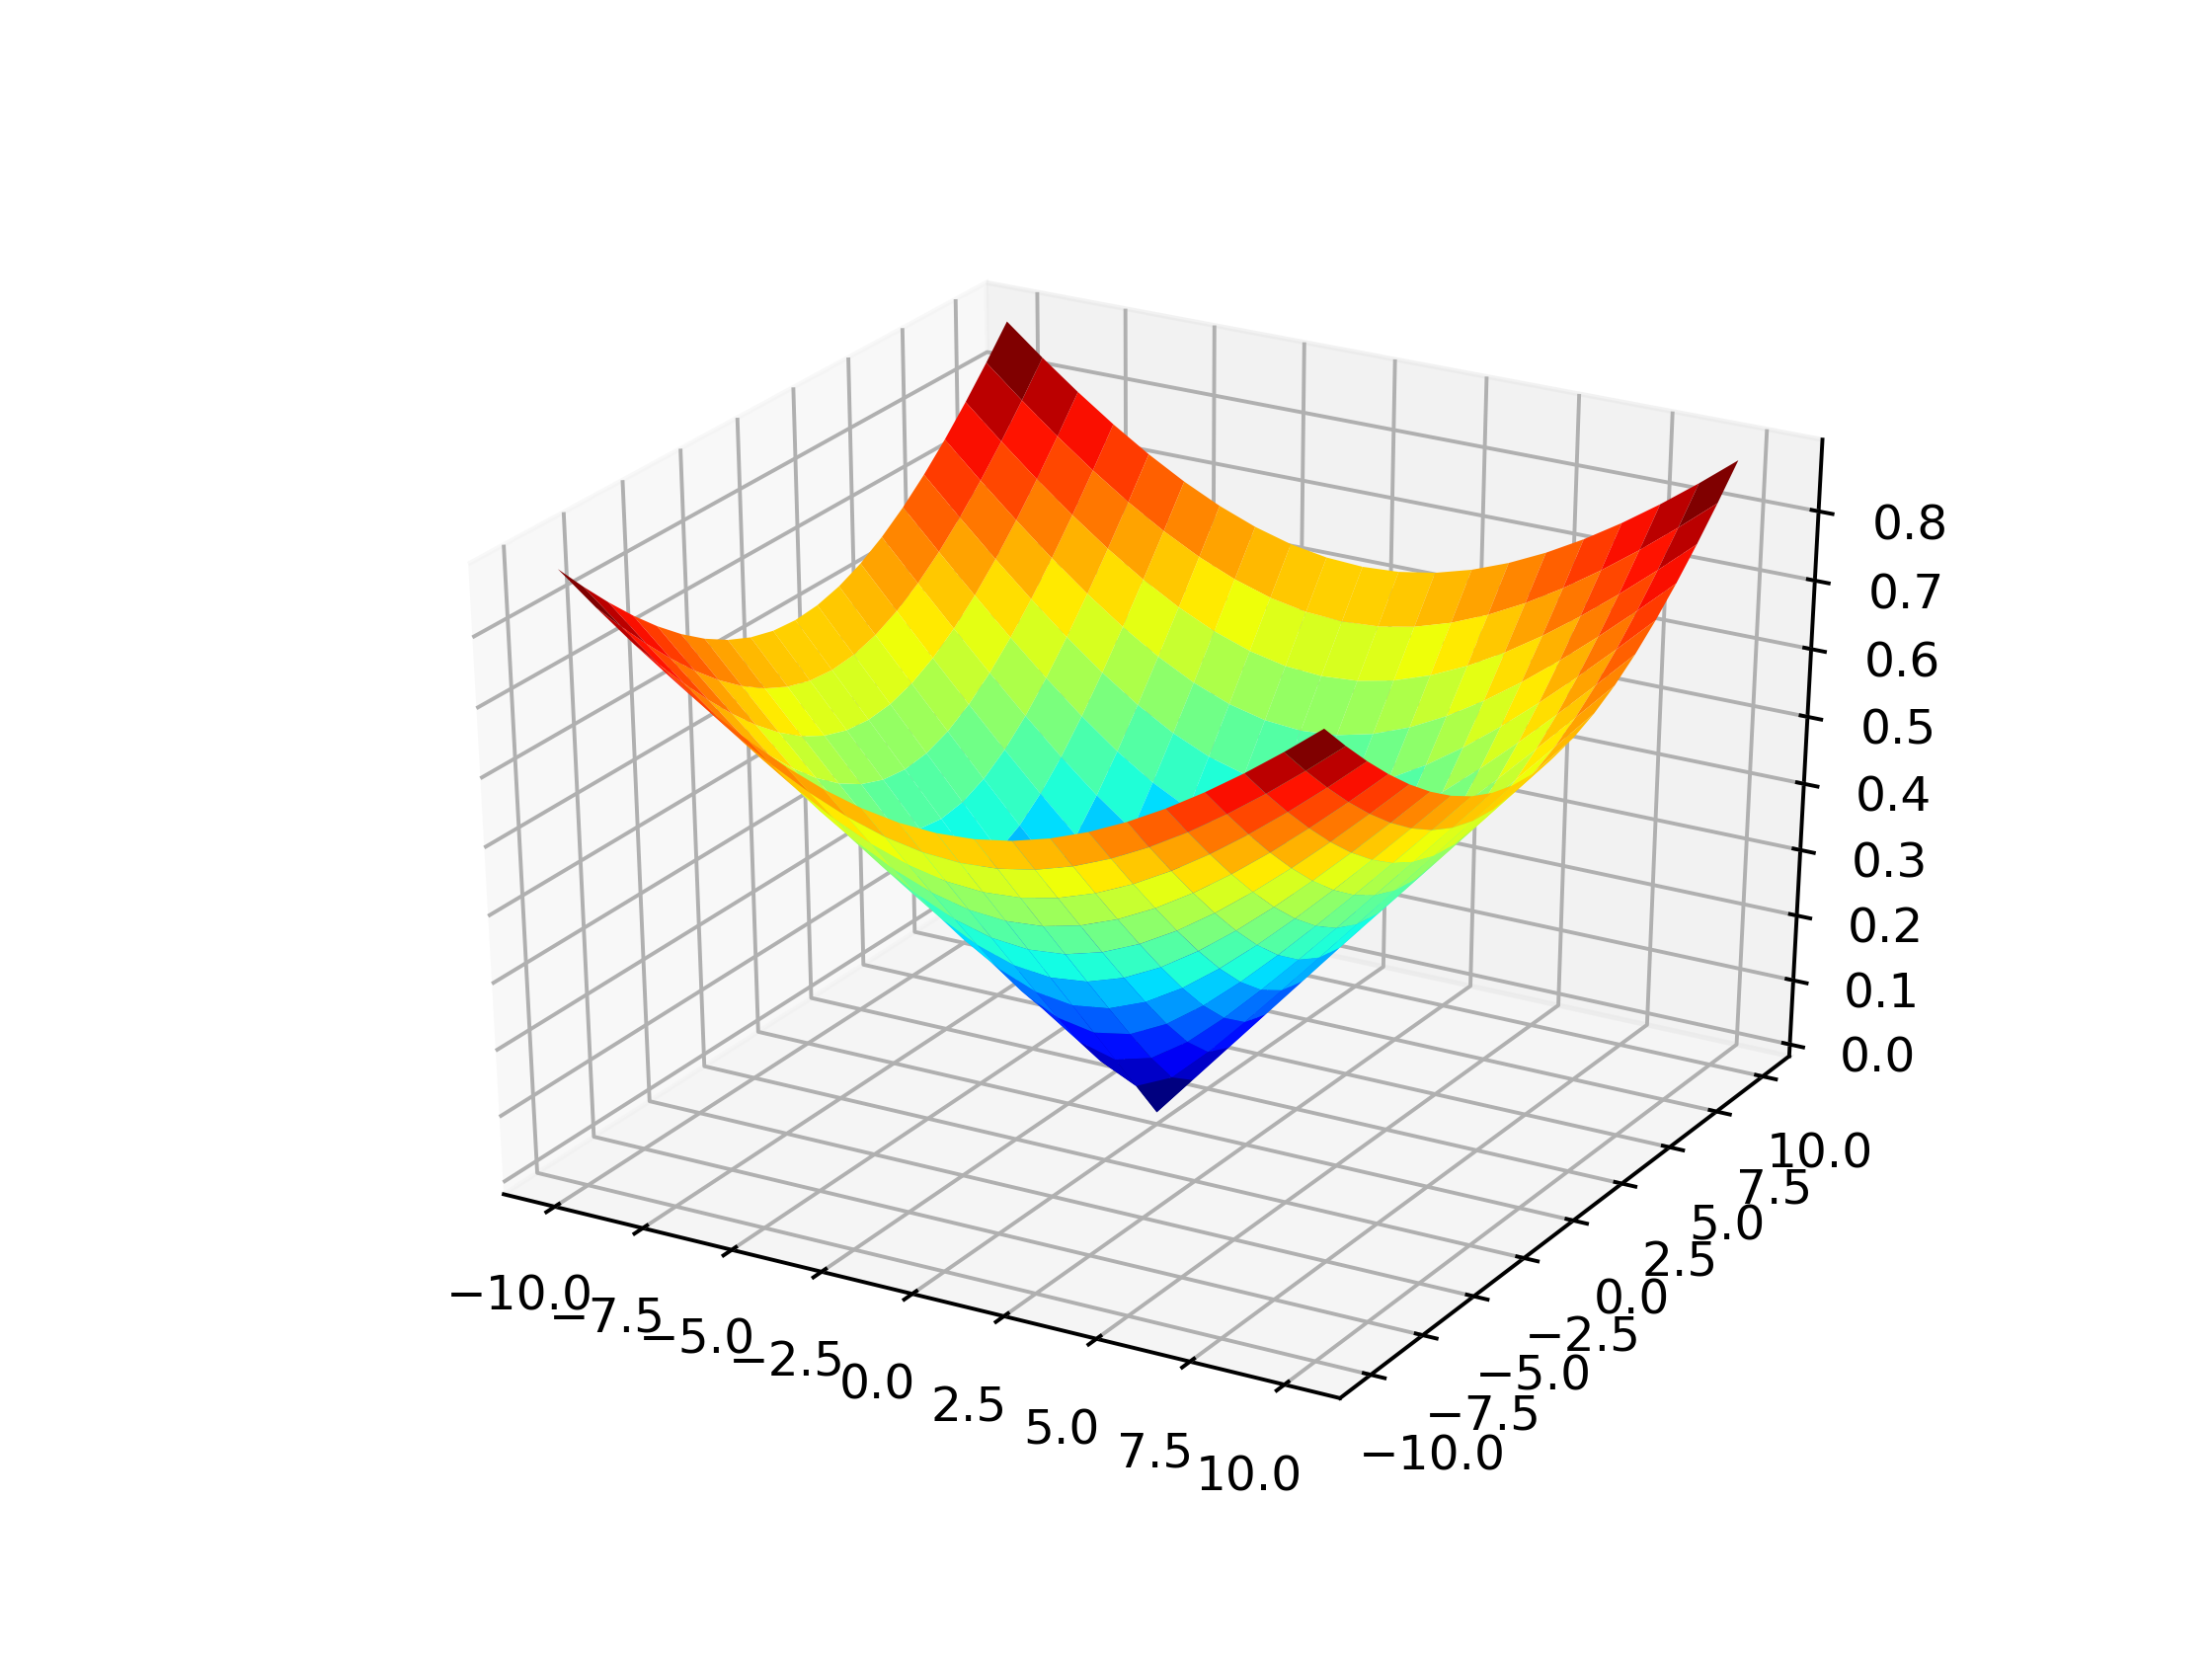

In [3]:
import sympy as sp
from sympy.vector import CoordSys3D
X, Y = x, y
x, y = sp.symbols('x,y')
N = CoordSys3D('N')
h = h0 + a/R**2*x*y
gradh = h.diff(x, 1)*N.i + h.diff(y, 1)*N.j
mag_gradh = np.sqrt(sp.lambdify((x, y), gradh.dot(gradh))(X, Y))
fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection="3d")
surf = ax3.plot_surface(X, Y, mag_gradh, cmap=plt.cm.jet)

c) Skaler likningene. Se [løsningsforslag](https://www.uio.no/studier/emner/matnat/math/MEK1100/v20/undervisningsmateriale/losningsforslag.pdf).